In [17]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Import data and creat DataFrame

file_path = 'Resources/fastfood.csv'
fast_food_df = pd.read_csv(file_path)

fast_food_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [3]:
# CLEAN DATA
# Update the 'salad' column to True if the substring 'salad' exists in the 'item' column
fast_food_df['salad'] = fast_food_df['item'].str.contains("salad", case=False)

# Drop kids menu items
kids_index = fast_food_df[fast_food_df['item'].str.contains("kids", case=False)].index
fast_food_df = fast_food_df.drop(kids_index)

# Drop 'vit_a', 'vit_c', 'calcium' columns
fast_food_df = fast_food_df[['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'salad']]

fast_food_df = fast_food_df.reset_index(drop=True)

In [4]:
fast_food_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,False
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,False
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,False
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,False
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,False


In [13]:

# Group the dataframe by restaurant names and sort the groups by Cholesterol value in descending order
cholesterol_sorted = fast_food_df.sort_values('cholesterol', ascending=False).groupby('restaurant').head(1)

# Print the sorted groups
print(cholesterol_sorted)


      restaurant                                            item  calories  \
192  Burger King                         American Brewhouse King      1550   
39     Mcdonalds      20 piece Buttermilk Crispy Chicken Tenders      2430   
69   Chick Fil-A                        30 piece Chicken Nuggets       970   
98         Sonic  Super Sonic Bacon Double Cheeseburger (w/mayo)      1280   
319       Subway             Footlong Chicken & Bacon Ranch Melt      1140   
280  Dairy Queen                              Large Cheese Curds      1050   
175        Arbys                          Triple Decker Sandwich      1030   
427    Taco Bell             XXL Grilled Stuft Burrito - Chicken       830   

     cal_fat  total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  \
192     1134        126     47.0        8.0          805    1820          21   
39      1270        141     24.0        2.0          475    6080         103   
69       414         46      2.5        0.0          285 

In [ ]:
# CHOLESTEROL ANALYSIS

In [20]:
# Group the dataframe by restaurant names
restaurant_groups = fast_food_df.groupby('restaurant')

# Get the highest cholesterol value item for each restaurant
highest_cholesterol = restaurant_groups.apply(lambda x: x.loc[x['cholesterol'].idxmax()])

# Create a new dataframe with the results
cholesterol_df = pd.DataFrame({
    'restaurant': highest_cholesterol['restaurant'],
    'item': highest_cholesterol['item'],
    'cholesterol': highest_cholesterol['cholesterol']
})

# Print the new dataframe
print(cholesterol_df)


              restaurant                                            item  \
restaurant                                                                 
Arbys              Arbys                          Triple Decker Sandwich   
Burger King  Burger King                         American Brewhouse King   
Chick Fil-A  Chick Fil-A                        30 piece Chicken Nuggets   
Dairy Queen  Dairy Queen                              Large Cheese Curds   
Mcdonalds      Mcdonalds      20 piece Buttermilk Crispy Chicken Tenders   
Sonic              Sonic  Super Sonic Bacon Double Cheeseburger (w/mayo)   
Subway            Subway             Footlong Chicken & Bacon Ranch Melt   
Taco Bell      Taco Bell             XXL Grilled Stuft Burrito - Chicken   

             cholesterol  
restaurant                
Arbys                155  
Burger King          805  
Chick Fil-A          285  
Dairy Queen          180  
Mcdonalds            475  
Sonic                260  
Subway               19

In [24]:
# Sort the dataframe by cholesterol value in descending order
cholesterol_df = cholesterol_df.sort_values('cholesterol', ascending=False)


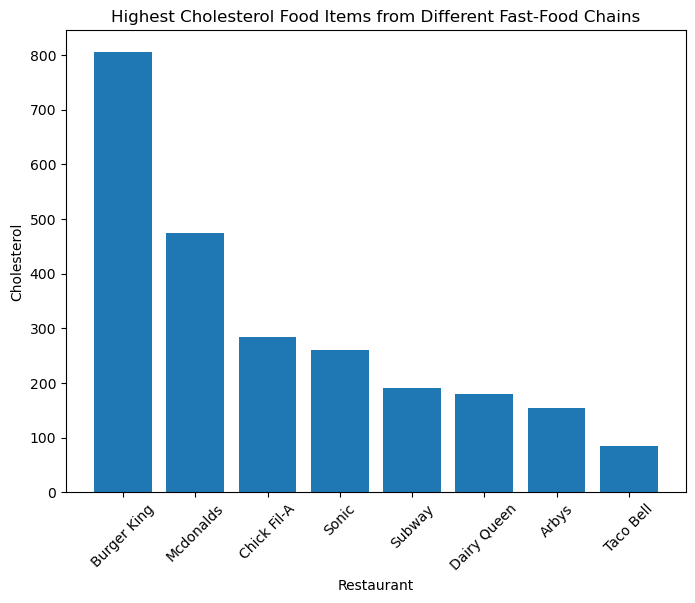

In [25]:
# Create a bar chart using matplotlib

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(cholesterol_df['restaurant'], cholesterol_df['cholesterol'])
ax.set_ylabel('Cholesterol')
ax.set_xlabel('Restaurant')
ax.set_title('Highest Cholesterol Food Items from Different Fast-Food Chains')
plt.xticks(rotation=45)

plt.show()

In [21]:
# Analysis -
# We can see through the bar graph that Burger King has the item (American Brewhouse King) 
# with highest cholesterol by a large margin. Taco Bell and Arby's have items with lower cholesterol values. 
# If someone has Cholesterol issues, they are advised to order cautiously from Burger King.
# Suggested to dine preferrably at Taco Bell or Arby's.

In [ ]:
# CALORIES ANALYSIS

In [32]:
# Group the dataframe by restaurant names and sort the groups by Calories value in descending order
calories_sorted = fast_food_df.sort_values('calories', ascending=False).groupby('restaurant').head(1)

# Print the sorted groups
print(calories_sorted)

      restaurant                                              item  calories  \
39     Mcdonalds        20 piece Buttermilk Crispy Chicken Tenders      2430   
192  Burger King                           American Brewhouse King      1550   
115        Sonic  Garlic Parmesan Dunked Ultimate Chicken Sandwich      1350   
270  Dairy Queen     6 Piece Chicken Strip Basket w/ Country Gravy      1260   
309       Subway                         Footlong Big Hot Pastrami      1160   
175        Arbys                            Triple Decker Sandwich      1030   
69   Chick Fil-A                          30 piece Chicken Nuggets       970   
426    Taco Bell                  XXL Grilled Stuft Burrito - Beef       880   

     cal_fat  total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  \
39      1270        141     24.0        2.0          475    6080         103   
192     1134        126     47.0        8.0          805    1820          21   
115      900        100     17.0       

In [33]:
# Group the dataframe by restaurant names
restaurant_groups = fast_food_df.groupby('restaurant')

# Get the highest calories value item for each restaurant
highest_calories = restaurant_groups.apply(lambda x: x.loc[x['calories'].idxmax()])

# Create a new dataframe with the results
calories_df = pd.DataFrame({
    'restaurant': highest_calories['restaurant'],
    'item': highest_calories['item'],
    'calories': highest_calories['calories']
})

# Print the new dataframe
print(calories_df)

              restaurant                                              item  \
restaurant                                                                   
Arbys              Arbys                            Triple Decker Sandwich   
Burger King  Burger King                           American Brewhouse King   
Chick Fil-A  Chick Fil-A                          30 piece Chicken Nuggets   
Dairy Queen  Dairy Queen     6 Piece Chicken Strip Basket w/ Country Gravy   
Mcdonalds      Mcdonalds        20 piece Buttermilk Crispy Chicken Tenders   
Sonic              Sonic  Garlic Parmesan Dunked Ultimate Chicken Sandwich   
Subway            Subway                         Footlong Big Hot Pastrami   
Taco Bell      Taco Bell                  XXL Grilled Stuft Burrito - Beef   

             calories  
restaurant             
Arbys            1030  
Burger King      1550  
Chick Fil-A       970  
Dairy Queen      1260  
Mcdonalds        2430  
Sonic            1350  
Subway           1160  
Tac

In [27]:
# Sort the dataframe by calories value in descending order
calories_df = calories_df.sort_values('calories', ascending=False)

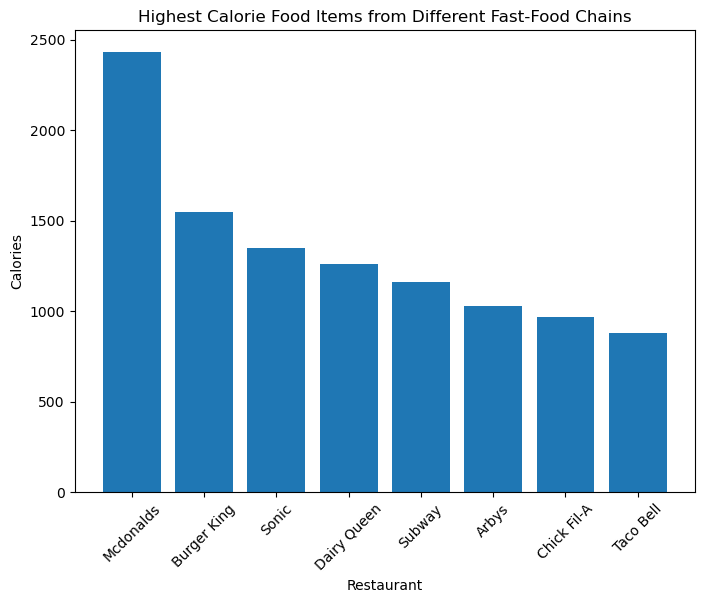

In [29]:
# Create a bar chart using matplotlib

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(calories_df['restaurant'], calories_df['calories'])
ax.set_ylabel('Calories')
ax.set_xlabel('Restaurant')
ax.set_title('Highest Calorie Food Items from Different Fast-Food Chains')
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Analysis -
# We can see through the bar graph that McDonalds has the item (20 piece Buttermilk Crispy Chicken Tenders) 
# with highest Calories by a large margin. Taco Bell Chick Fil-A and Arby's have items with lower calories values. 
# If someone is looking to cut calories, they are advised to order cautiously from McDonalds.
# Suggested to dine preferrably at Taco Bell, Chick Fil-A or Arby's.

In [ ]:
# WHAT TO ORDER IF YOU ARE WATCHING CALORIES

In [44]:
# Group the dataframe by restaurant names
restaurant_groups = fast_food_df.groupby('restaurant')

# Get the lowest calories value item for each restaurant
lowest_calories = restaurant_groups.apply(lambda x: x.loc[x['calories'].idxmin()])

# Create a new dataframe with the results
calories_min_df = pd.DataFrame({
    'restaurant': lowest_calories['restaurant'],
    'item': lowest_calories['item'],
    'calories': lowest_calories['calories']
})

# Print the new dataframe
print(calories_min_df)

              restaurant                             item  calories
restaurant                                                         
Arbys              Arbys               Chopped Side Salad        70
Burger King  Burger King          4 Piece Chicken Nuggets       190
Chick Fil-A  Chick Fil-A  4 Piece Grilled Chicken Nuggets        70
Dairy Queen  Dairy Queen                       Side Salad        20
Mcdonalds      Mcdonalds  Premium Asian Salad w/o Chicken       140
Sonic              Sonic            Ultimate Chicken Club       100
Subway            Subway              Veggie Delite Salad        50
Taco Bell      Taco Bell              Fresco Crunchy Taco       140


In [45]:
# Sort the dataframe by calories value in descending order
calories_min_df = calories_min_df.sort_values('calories', ascending=False)

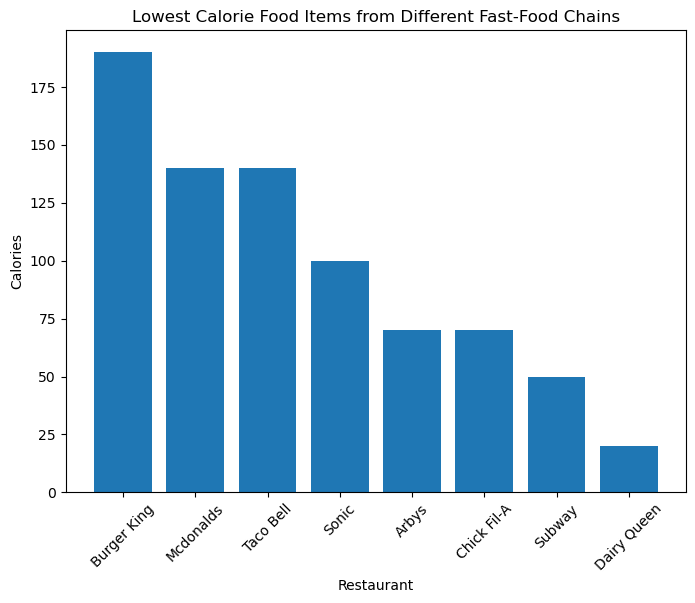

In [46]:
# Create a bar chart using matplotlib

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(calories_min_df['restaurant'], calories_min_df['calories'])
ax.set_ylabel('Calories')
ax.set_xlabel('Restaurant')
ax.set_title('Lowest Calorie Food Items from Different Fast-Food Chains')
plt.xticks(rotation=45)

plt.show()